In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
# https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data
df_trees = pd.read_csv('./data/Street_Tree_Census/2015_Street_Tree_Census_-_Tree_Data_20250830.csv')
print('Records:', len(df_trees))
print('Columns:', list(df_trees.columns))
df_trees[:1]

Records: 683788
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09


In [55]:
# "lm" stands for Lower Manhattan.
df_trees_lm = df_trees[
    (
        (df_trees['status'] == 'Alive')
        & (df_trees['borough'] == 'Manhattan')
        & (
            (df['nta_name'] == 'SoHo-TriBeCa-Civic Center-Little Italy')
            | (df['nta_name'] == 'Battery Park City-Lower Manhattan')
            | (df['nta_name'] == 'Chinatown')
            | (df['nta_name'] == 'West Village')
            | (df['nta_name'] == 'Lower East Side')
            | (df['nta_name'] == 'East Village')
        )
    )
]
print('Records:', len(df_trees_lm))
print('Columns:', list(df_trees_lm.columns))
df_trees_lm[:1]

Records: 11839
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
28,201555,102919,09/04/2015,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,NoDamage,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,71 STANTON STREET,10002,New York,103,1,Manhattan,1,65,26,MN27,Chinatown,1003601,New York,40.721807,-73.98983,987069.0888,202250.6142,1.0,3601.0,1077637.0,1.004160e+09


In [6]:
df_trees[['status']].value_counts()

status
Alive     652173
Stump      17654
Dead       13961
Name: count, dtype: int64

In [37]:
df_trees[['borough']].value_counts()

borough      
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: count, dtype: int64

In [40]:
df_trees[df_trees['borough'] == 'Manhattan'][['nta_name']].value_counts()

nta_name                                  
Upper West Side                               5881
Upper East Side-Carnegie Hill                 4673
West Village                                  3837
Central Harlem North-Polo Grounds             3515
Washington Heights South                      2990
Hudson Yards-Chelsea-Flatiron-Union Square    2988
Morningside Heights                           2751
Washington Heights North                      2684
Central Harlem South                          2670
East Harlem North                             2591
Hamilton Heights                              2407
Lenox Hill-Roosevelt Island                   2327
Yorkville                                     2269
Turtle Bay-East Midtown                       2253
SoHo-TriBeCa-Civic Center-Little Italy        2215
Lincoln Square                                2065
East Harlem South                             2014
Clinton                                       2008
Lower East Side                        

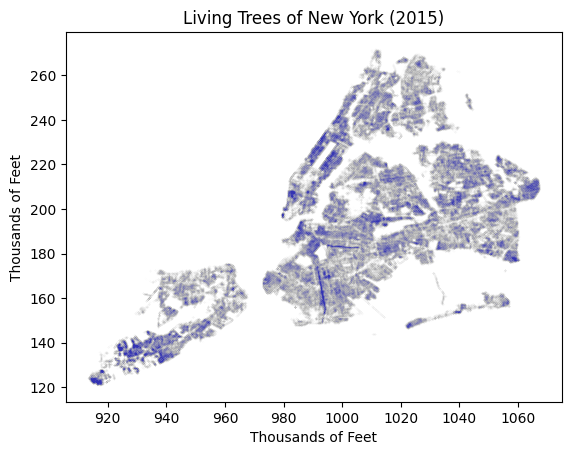

In [36]:
df = df_trees[
    df_trees['status'] == 'Alive'
]

plt.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.01))
plt.title('Living Trees of New York (2015)')
plt.xlabel('Thousands of Feet')
plt.ylabel('Thousands of Feet')
plt.show()

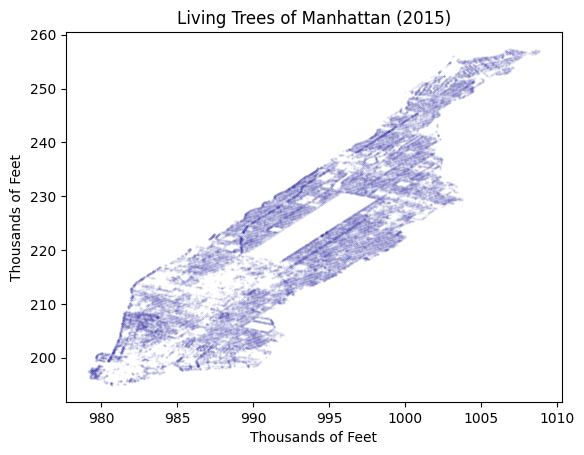

In [39]:
df = df_trees[
    (df_trees['status'] == 'Alive')
    & (df_trees['borough'] == 'Manhattan')
]

plt.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.1))
plt.title('Living Trees of Manhattan (2015)')
plt.xlabel('Thousands of Feet')
plt.ylabel('Thousands of Feet')
plt.show()

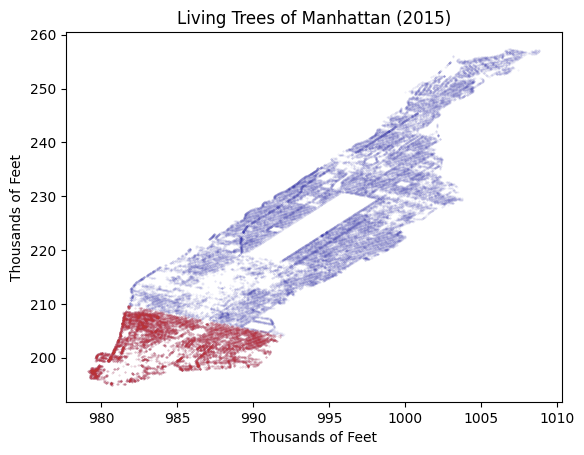

In [56]:
df = df_trees[
    (df_trees['status'] == 'Alive')
    & (df_trees['borough'] == 'Manhattan')
]
df_highlight = df_trees_lm

plt.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.1))
plt.scatter(df_highlight['x_sp'] / 1000, df_highlight['y_sp'] / 1000, s=0.1, color=(0.8, 0.2, 0.2, 0.2))
plt.title('Living Trees of Manhattan (2015)')
plt.xlabel('Thousands of Feet')
plt.ylabel('Thousands of Feet')
plt.show()

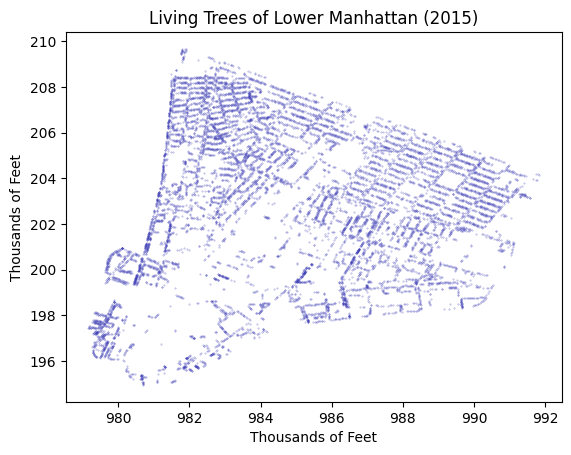

In [57]:
plt.scatter(df_trees_lm['x_sp'] / 1000, df_trees_lm['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.5))
plt.title('Living Trees of Lower Manhattan (2015)')
plt.xlabel('Thousands of Feet')
plt.ylabel('Thousands of Feet')
plt.show()

In [59]:
df_trees_lm[['spc_latin', 'spc_common']].value_counts()[:10]

spc_latin                           spc_common       
Gleditsia triacanthos var. inermis  honeylocust          2329
Pyrus calleryana                    Callery pear         1477
Ginkgo biloba                       ginkgo               1190
Platanus x acerifolia               London planetree      896
Styphnolobium japonicum             Sophora               818
Zelkova serrata                     Japanese zelkova      764
Tilia cordata                       littleleaf linden     636
Quercus palustris                   pin oak               510
Tilia americana                     American linden       316
Fraxinus pennsylvanica              green ash             239
Name: count, dtype: int64

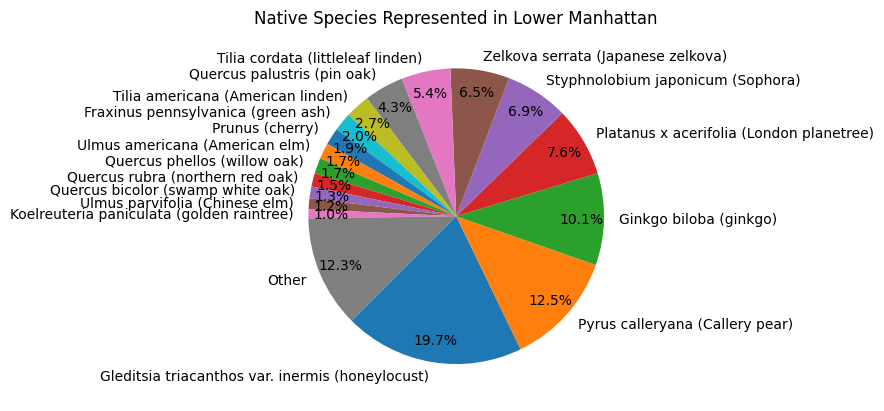

In [67]:
df = df_trees_lm

df_labeled = df['spc_latin'] + ' (' + df['spc_common'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 100  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Native Species Represented in Lower Manhattan',
    autopct='%1.1f%%',
    pctdistance=0.85,  # Determined by fiddling.
    startangle=-135,  # Determined by fiddling.
)
ax.set_ylabel('')
pass